In [1]:
import pandas as pd
import numpy as np
import scipy.sparse as sp

In [2]:
def train(dfTrain, dfTrainLbl, lda, w, b):    
    # print dfTrain.values[:,[0]].shape
    # print dfTrain.values[:,[1]].shape
    # print dfTrain.values[:,[2]].shape
    row = np.array(dfTrain.values[:,[1]])
    row = row.flatten()
    column = np.array(dfTrain.values[:,[0]])
    column = column.flatten()
    mat = np.array(dfTrain.values[:,[2]])
    mat = mat.flatten()
    '''convert to sparse matrix'''
    X = sp.csr_matrix((mat, (row-1, column-1)))                      
    # X = sp.csr_matrix(dfTrain.values)
    # csr_matrix((data, (row_ind, col_ind)), [shape=(M, N)])
    # , shape = (dfTrain.values.shape[0], dfTrain.values.shape[1]))
    # X = scipy.sparse.csr_matrix(df.values)
    XT = X.transpose()
    d = X.shape[0]
    n = X.shape[1]
#     print X.shape[0]
    # print XT.shape
    # print X.shape
    a = np.dot(X,XT)
    a = 2*a.diagonal()
#     print "a", a
    y = np.array(dfTrainLbl.values)
    y = y.flatten()
    # print y.shape
    y = y.transpose()
    # print y.shape
    # print dfTrainLbl.shape
    ##########################################
#     w = np.random.rand(d)
    #w = np.zeros(d)
    ######################################
#     print w.shape
#     b = 0
#     In = np.ones(n)
#     Id = np.ones(d)
#     print b.shape
    # w = w.transpose()
    # print 
    # print X
    # print X[0]
    # v = X[0].toarray()#np.squeeze(np.asarray(X[0]))
    # v = np.array(v)
    # v = v.reshape(-1)
    # print v.shape
    # v = v.flatten()
    # print (w[0]*(X[0].T)).shape
    # print r.reshape(r.shape[0], 1).shape
    # print r.shape[0]

    # print 2*(X[0].dot((r.reshape(r.shape[0], 1) - (w[0]*(X[0].T)))))
    # print r.shape

    # print 2*(X[0].dot((r - w[0]*X[0].T)))
    # print r.shape
    # print r
    # r = r.reshape(r.shape[0], 1) + (w[0] - wkOld)*X[0].T
    # r = np.squeeze(np.asarray(r))
    # print r.shape

#     ldaMax = 2*np.amax(abs(X.dot(y - (np.sum(y)/float(n)))))
#     print ldaMax
#     lda = ldaMax    
#     lda = lda/2
#     print "lambda",lda 
    delta = 0.01
#     prevRmse = 0
    currRmse = rmse(X, w, b, y)
    #     lda = 30
#     print "rms", abs(currRmse - prevRmse)
#     print 'Train '
    prevLoss = 0
    currLoss = loss(X, w, b, y, lda)
    #currLoss = 99999999999999999
    while(abs(prevLoss - currLoss) > delta):
        r = (y - X.T.dot(w)) - b
        #     print r
        bOld = b
        b = np.full(n, np.sum(r+b)/float(n)) #np.divide((r+b),n)
        r = r - b + bOld;
        #     print "r", r
        wkOld = 0
        for k in range(0,d):
            ck = 2*(X[k].dot((r.reshape(r.shape[0], 1) + (w[k]*(X[k].T)))))
#             print ck
            wkOld = w[k]
            if(ck < (-1)*lda):
                w[k] = (ck + lda)/a[k]
            elif(ck > lda):
                w[k]  = (ck - lda)/a[k]
            else:
                w[k] = 0
                
            r = r.reshape(r.shape[0], 1) - (w[k] - wkOld)*X[k].T
            r = np.squeeze(np.asarray(r))            
        prevRmse = currRmse     
        currRmse = rmse(X, w, b, y)
        prevLoss = currLoss
        currLoss = loss(X, w, b, y, lda)
        #cLoss = loss(X, w, b, y, lda)
#         print "rms", currRmse
#         print "currrms - prev", currRmse - prevRmse
#         print "loss", loss(X, w, b, y, lda)
            #     print prevRmse
#             print currRmse
    #         print "rms", abs(currRmse - prevRmse)
#             print "loss", loss(X, w, b, y, lda)
#     loss1 = 
#     print "loss", loss(X, w, b, y, lda)
    return w,b,currRmse

In [3]:
# rmse(w.T.dot(X), Y)
def rmse(X, w, b, y):
#     print w.shape
#     print X.shape
#     print y.shape
    r = y - X.T.dot(w) - b
    
    r_sqr = np.square(r)
    sqrSum = np.sum(r_sqr)
    n = X.shape[0]
#     print n
    tmp = sqrSum/float(n)
    import math
#     print math.sqrt(tmp)
    return math.sqrt(tmp)
    

In [4]:
def loss(X, w, b, y, lda):
    r = (X.T.dot(w) + b) -y
    r_sqr = np.square(r)
    sqrSum = np.sum(r_sqr)
    w = np.absolute(w)
    reg = np.sum(w)
    reg = lda*reg
    return sqrSum + reg

In [5]:
if __name__ == '__main__':    
    
    '''Parse Data'''
    train_dataset = "trainData.txt"
    trainingData = pd.read_csv(train_dataset, sep = ' ', header = None)
    train_label = "trainLabels.txt"
    trainingLabels = pd.read_csv(train_label, header = None)
    
    val_dataset = "valData.txt"
    valData = pd.read_csv(val_dataset, sep = ' ', header = None)
    val_label = "valLabels.txt"
    valLabels = pd.read_csv(val_label, header = None)
#     pd.read_csv("/media/indu/New Volume/study/Graduate/ML/Assignment1/Lasso/testData.txt", delim_whitespace = True, names = ["instance", "feature", "value"], header = None )
#     valData = pd.read_table("/media/indu/New Volume/study/Graduate/ML/Assignment1/Lasso/valData.txt", delim_whitespace = True, names = ["instance", "feature", "value"], header = None)
#     trainLabels = pd.read_table("/media/indu/New Volume/study/Graduate/ML/Assignment1/Lasso/trainLabels.txt")
#     valLabels = pd.read_table("/media/indu/New Volume/study/Graduate/ML/Assignment1/Lasso/valLabels.txt")    
    #print trainingData
    dfTrain = pd.DataFrame(data = trainingData)
    dfTrainLbl = pd.DataFrame(data = trainingLabels)
    
    dfVal = pd.DataFrame(data = valData)
    dfValLbl = pd.DataFrame(data = valLabels)

    row = np.array(dfVal.values[:,[1]])
    row = row.flatten()
    column = np.array(dfVal.values[:,[0]])
    column = column.flatten()
    mat = np.array(dfVal.values[:,[2]])
    mat = mat.flatten()
    '''convert to sparse matrix'''
    X = sp.csr_matrix((mat, (row-1, column-1))) 
    y = np.array(dfValLbl.values)
    y = y.flatten()
    d = X.shape[0]
    n = X.shape[1]
#     print 'test'
    ldaMax = 2*np.amax(abs(X.dot(y - (np.sum(y)/float(n)))))
    ldaPrev = 0
    lda = ldaMax
    
#     train(dfTrain, dfTrainLbl, lda)
#     prevLossVal = lossVal
#     delta = 0.01
#     lossTrain = train(dfTrain, dfTrainLbl, lda)
#     lossVal = train(dfVal, dfValLbl, lda)
#     prevLossVal = 999999999999999
#     lossVal = train(dfVal, dfValLbl, lda)
#     while(prevLossVal - lossVal > delta):        
    prevRmse = 999999999999999#999999999999999
    currRmse = 999999999999998
#     delta = 0.001
    trainRmseList = []
    valRmseList = []
    lambdaList = []
    nonZeroList = []
    while(prevRmse > currRmse):
        w = np.random.rand(d)
        b = 0
        w,b,trainRmse = train(dfTrain, dfTrainLbl, lda, w, b)
        nonZeroList.append( np.count_nonzero(w))
        trainRmseList.append(trainRmse)
        #X,w,b,y
        prevRmse = currRmse
        currRmse = rmse(X,w,b,y)
        valRmseList.append(currRmse)
        lambdaList.append(lda)        
        print "lambda", lda
        print "TrainRmse", trainRmse
        print "ValRmse", currRmse
#         prevLossVal = lossVal         
#         print "PrevLossVal", prevLossVal
#         lambdaBest = lda
        lda = lda/2
#         print "lossTrain", lossTrain
#         print "lossVal", lossVal
        
#     while():
#         lda = lda/2
#         train(dfTrain, dfTrainLbl, lda)
#         train(dfVal, dfValLbl, lda)
#     print trainingData
#     print dfTrainLbl.shape
#     print dfTrain.values[:,[1]]
#     data[:, [1, 9]]

lambda 1217.5173296
TrainRmse 6.19298860239
ValRmse 6.18127570446
lambda 608.7586648
TrainRmse 5.88462710741
ValRmse 5.89192479847
lambda 304.3793324
TrainRmse 5.42649989976
ValRmse 5.45381165952
lambda 152.1896662
TrainRmse 4.99608100333
ValRmse 5.05599642353
lambda 76.0948331
TrainRmse 4.51185566228
ValRmse 4.61464068319
lambda 38.04741655
TrainRmse 4.11250202278
ValRmse 4.25676781738
lambda 19.023708275
TrainRmse 3.75534862888
ValRmse 3.96660197343
lambda 9.5118541375
TrainRmse 3.39108068746
ValRmse 3.72284902547
lambda 4.75592706875
TrainRmse 3.09792740941
ValRmse 3.58527022662
lambda 2.37796353438
TrainRmse 2.8741169188
ValRmse 3.55725389418
lambda 1.18898176719
TrainRmse 2.74807604588
ValRmse 3.61223867881


In [7]:
print lambdaList[len(lambdaList) - 2]
bestLambda = lambdaList[len(lambdaList) - 2]
w = np.random.rand(d)
b = 0
wBest, bBest, trainRmse = train(dfTrain, dfTrainLbl, bestLambda, w, b)

2.37796353438


In [9]:
ftrs = "featureTypes.txt"
ftrData = pd.read_csv(ftrs, header = None)
dfFtrData = pd.DataFrame(data = ftrData)
f = np.array(dfFtrData.values)
f = f.flatten()
index = np.argsort(wBest)

['earns' 'cherry berry' 'high' 'soft' 'sparkler' 'cuts' 'brightened'
 'semillon' 'black' 'liqueur']
['banana' 'yeast' 'spices' ..., 'big' 'stars' 'spearmint']


In [10]:
print f[index[:10]]
print f[index[-10:]]

['earns' 'cherry berry' 'high' 'soft' 'sparkler' 'cuts' 'brightened'
 'semillon' 'black' 'liqueur']
['acidity provides' 'sweet black' 'truly' 'nearly' 'ageability' 'lemony'
 'lifesaver' 'big' 'stars' 'spearmint']


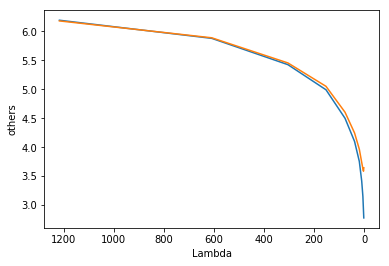

In [23]:
import matplotlib.pyplot as plt
# trainRmseList = []
# valRmseList = []
# lambdaList = []
# nonZeroList = []
plt.plot(lambdaList, trainRmseList)
plt.plot(lambdaList, valRmseList)
# plt.plot(lambdaList, nonZeroList)
plt.xlabel('Lambda')
plt.ylabel('others')
# plt.legend((trainRmseList, valRmseList), ('Train', 'Validation'))
ax = plt.gca()
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

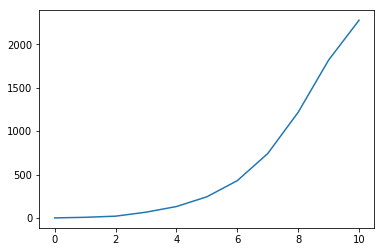

In [97]:
plt.plot(nonZeroList)
plt.show()

In [21]:
wVal, bVal, valRmse = train(dfVal, dfValLbl, bestLambda, wBest, bBest)
print valRmse

2.89192516381


In [9]:
test_dataset = "testData.txt"
testData = pd.read_csv(test_dataset, sep = ' ', header = None)
dfTest = pd.DataFrame(data = testData)
rowT = np.array(dfTest.values[:,[1]])
rowT = row.flatten()
columnT = np.array(dfTest.values[:,[0]])
columnT = column.flatten()
matT = np.array(dfTest.values[:,[2]])
matT = mat.flatten()
XTest = sp.csr_matrix((matT, (rowT-1, columnT-1))) 
print wBest.shape
print XTest.shape
print bBest.shape
# y = wBest.T.dot(XTest) + bBest
# print y
# numpy.savetxt("predTestLabels.csv")




(3000,)
(3000, 10000)
(10000,)


In [ ]:
print wBest.shape
print Xtest.shape
print bBest.shape
y = wBest.T.dot(XTest) + bBest
print y
# numpy.savetxt("predTestLabels.csv")